# H-calls4famCluster

## Data Table

In [ ]:
# @title
import datetime
print(datetime.datetime.now())

2024-03-25 03:17:28.274634


Similar to the example we demonstrate in the class, here are some samples of malware call sequences.

Although you can know the dataset contains four malware families (as shown by the sub-directory), in this homework, you should pretend you have no idea what malware family a sample belongs to.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# get data from github

import requests

url = 'https://github.com/hsiaom26/DS4CS-24/raw/main/data/calls4fam_0522_tfds.tgz'

response = requests.get(url)

if response.status_code == 200:
    # Open the file for writing
    with open('calls4fam_0522_tfds.tgz', 'wb') as f:
        # Write the response content to the file
        f.write(response.content)
else:
    print('Error: Failed to download the file')

In [ ]:
!tar -zxvf calls4fam_0522_tfds.tgz

./calls4fam_0522/
./calls4fam_0522/2/
./calls4fam_0522/2/626.txt
./calls4fam_0522/2/834.txt
./calls4fam_0522/2/751.txt
./calls4fam_0522/2/866.txt
./calls4fam_0522/2/735.txt
./calls4fam_0522/2/850.txt
./calls4fam_0522/2/808.txt
./calls4fam_0522/2/847.txt
./calls4fam_0522/2/661.txt
./calls4fam_0522/2/809.txt
./calls4fam_0522/2/686.txt
./calls4fam_0522/2/638.txt
./calls4fam_0522/2/774.txt
./calls4fam_0522/2/758.txt
./calls4fam_0522/2/791.txt
./calls4fam_0522/2/631.txt
./calls4fam_0522/2/854.txt
./calls4fam_0522/2/629.txt
./calls4fam_0522/2/616.txt
./calls4fam_0522/2/889.txt
./calls4fam_0522/2/617.txt
./calls4fam_0522/2/902.txt
./calls4fam_0522/2/772.txt
./calls4fam_0522/2/837.txt
./calls4fam_0522/2/623.txt
./calls4fam_0522/2/815.txt
./calls4fam_0522/2/822.txt
./calls4fam_0522/2/648.txt
./calls4fam_0522/2/768.txt
./calls4fam_0522/2/884.txt
./calls4fam_0522/2/694.txt
./calls4fam_0522/2/745.txt
./calls4fam_0522/2/769.txt
./calls4fam_0522/2/839.txt
./calls4fam_0522/2/784.txt
./calls4fam_0522/

In [ ]:
!ls -al calls4fam_0522

total 56
drwxr-xr-x 6 root root  4096 Feb 21 04:06 .
drwxr-xr-x 1 root root  4096 Mar 25 01:43 ..
drwxr-xr-x 2 root root 12288 Feb 21 04:06 0
drwxr-xr-x 2 root root 12288 Feb 21 04:06 1
drwxr-xr-x 2 root root 12288 Feb 21 04:06 2
drwxr-xr-x 2 root root 12288 Feb 21 04:06 5


In [ ]:
def count_api_calls(malware_text_file):
  aip_dict = dict()
  with open(malware_text_file, 'r') as file:
    call_seq = file.readline() # note: only one line in .txt file
    calls = call_seq.split()
    for call in calls:
      if call in aip_dict:
        aip_dict[call] += 1
      else:
        aip_dict[call] = 1
    return aip_dict

In [ ]:
import os
# A dictionary to collect all count_api_calls() return
malware_call_dict = dict()

# Define the root directory to walk through
root_dir = "/content/calls4fam_0522/"

# Walk through the directory and its subdirectories
for dir_name, subdir_list, file_list in os.walk(root_dir):

    # Read all .txt files in the current directory
    for file_name in file_list:
        if file_name.endswith(".txt"):
            # Read the file contents
            subdir = dir_name.split('/')[-1]
            malware_call_dict[subdir+'/'+file_name] = count_api_calls(os.path.join(dir_name, file_name))

In [ ]:
import pandas as pd

# Convert the dictionary to a DataFrame
malware_call_df = pd.DataFrame.from_dict(malware_call_dict, orient='index')
malware_call_df.fillna(0, inplace=True)
malware_call_df

,getpid,ugetrlimit,rt_sigaction,rt_sigprocmask,execve,brk,access,openat,fstat,mmap,...,tkill,SIGTRAP,clock_gettime,prctl,getdents,fsync,utime,vfork,utimensat,dup
1/545.txt,3.0,2.0,10.0,1.0,1.0,3.0,3.0,2.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/474.txt,1.0,0.0,7.0,1.0,1.0,3.0,3.0,2.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/551.txt,1.0,0.0,7.0,1.0,1.0,3.0,3.0,2.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/478.txt,1.0,0.0,7.0,1.0,1.0,3.0,3.0,2.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/549.txt,1.0,0.0,7.0,1.0,1.0,3.0,3.0,2.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/769.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/505.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/397.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/418.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
malware_binary_call_df = malware_call_df.applymap(lambda x: 1.0 if x > 0.0 else 0.0)
malware_binary_call_df

,getpid,ugetrlimit,rt_sigaction,rt_sigprocmask,execve,brk,access,openat,fstat,mmap,...,tkill,SIGTRAP,clock_gettime,prctl,getdents,fsync,utime,vfork,utimensat,dup
1/545.txt,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/474.txt,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/551.txt,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/478.txt,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/549.txt,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/769.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/505.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/397.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/418.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Q1

Now, your turn. Try K-means in Q1. You may use either `malware_call_df` or `malware_binary_call_df`.


### Q1-1

Writre code to apply K-means, use `euclidean` to evaluate distance. Show the Elbow Plot with avgWithinSS.

In [ ]:
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

X = malware_binary_call_df.values


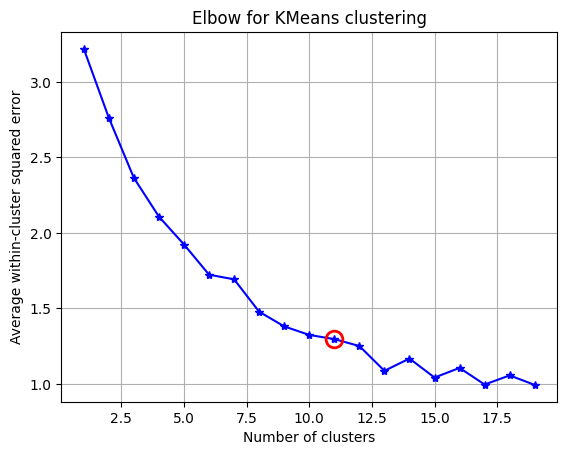

In [ ]:
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

X = malware_binary_call_df.values

#### cluster data into K =1...19 clusters
K = range(1,20)
KM = [kmeans(X,k) for k in K]
centroids = [c for (c,var) in KM]
avgWithinSS = [var for (cent,var)in KM]
D_K = [cdist(X, c, 'euclidean') for c in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_K]
dist = [np.min(D,axis=1) for D in D_K]

##### plot ###
k = 11
kIdx = k-1 # <----- you can change k

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12,
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster squared error')
plt.title('Elbow for KMeans clustering')
plt.show()


### Q1-2

How many clusters do you suggest by referencing the elbow plot? Why?

會有11個clusters，選擇分11個custers原因為它是下降快速轉為平緩的點，clusters的效果最好

### Q1-3

Show how many samples are there in each cluster? Is there any cluster which has only a few samples?

In [ ]:
cen, _ = kmeans(X, k)
cen.shape

(10, 121)

In [ ]:
D = cdist(X, cen, 'euclidean')
cIdx = np.argmin(D, axis=1)
dist = np.min(D, axis=1)


In [ ]:
# Sort cluster labels by count
counts = np.bincount(cIdx)
sorted_counts = np.argsort(counts)[::-1]

# Print the counts with cluster labels
for i in sorted_counts:
  print('{}    {}'.format(i, counts[i]))
print('dtype:', counts.dtype)

8    290
3    286
6    162
7    107
4    99
1    97
5    72
0    63
9    16
2    16
dtype: int64


### Q1-4

`malware_call_df` is better or `malware_binary_call_df` is better to represent the data? (open question)


malware_binary_call_df比malware_call_df比較好代表資料，原因是有行欄位(socket,connect,getsockname....ect.)內的數值範圍差異沒有過大

### Q1-5

what if we use some normalization or standardzation on `malware_call_df`? Would it be better to represent the data? (open question)

資料集使用normalization或者standardzation時，行欄位名稱(x1,x2,...,xm)值域落在0到1之間或者+1到-1之間，值較為一致，範圍不會差異過大，做gradient descent圖形時較不會有碗的形狀

## Q2

Use UPGMA to visualized the data. You may sample the dataset for better visualization (lets say 10% sample in each class).

### Q2-1

Plot UPGMA using 10% data

In [ ]:
import scipy
import scipy.cluster.hierarchy as sch
import matplotlib.pylab as plt

from scipy.spatial.distance import squareform, pdist, jaccard

In [ ]:
malware_binary_call_10_df = malware_binary_call_df.sample(frac=0.1)
malware_binary_call_10_df

,getpid,ugetrlimit,rt_sigaction,rt_sigprocmask,execve,brk,access,openat,fstat,mmap,...,tkill,SIGTRAP,clock_gettime,prctl,getdents,fsync,utime,vfork,utimensat,dup
1/383.txt,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5/1174.txt,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2/838.txt,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/527.txt,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2/781.txt,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/472.txt,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2/713.txt,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0/228.txt,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0/15.txt,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


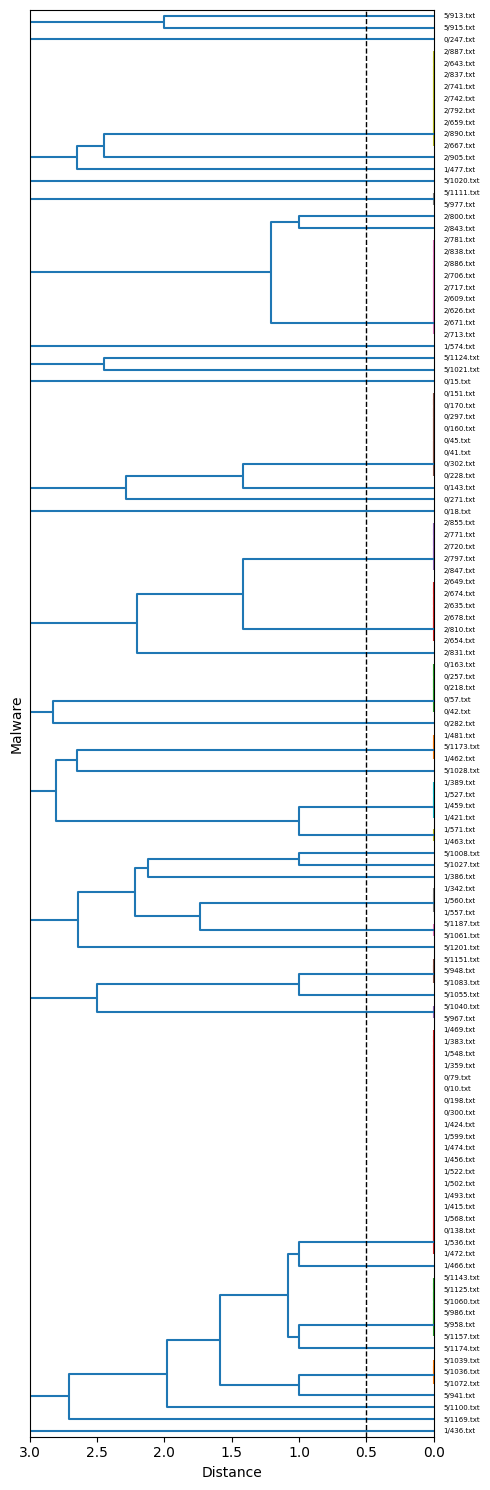

In [ ]:
# use binary features and euclidean distance
bd = pdist(malware_binary_call_10_df, metric='euclidean') # try jacc
upgma_threshold = 0.5
plt.figure(figsize=(5, 15))

Z = sch.linkage(bd, method='average')
P = sch.dendrogram(Z, labels=malware_binary_call_10_df.index,
                   color_threshold=upgma_threshold, orientation = 'left')
plt.axvline(x=upgma_threshold, linewidth=1, color='black', linestyle='--')

plt.xlabel('Distance')
plt.ylabel('Malware')
plt.xlim([3, 0])
plt.tight_layout()
plt.show()

### Q2-2
Try to use jaccard distance in UPGMA.

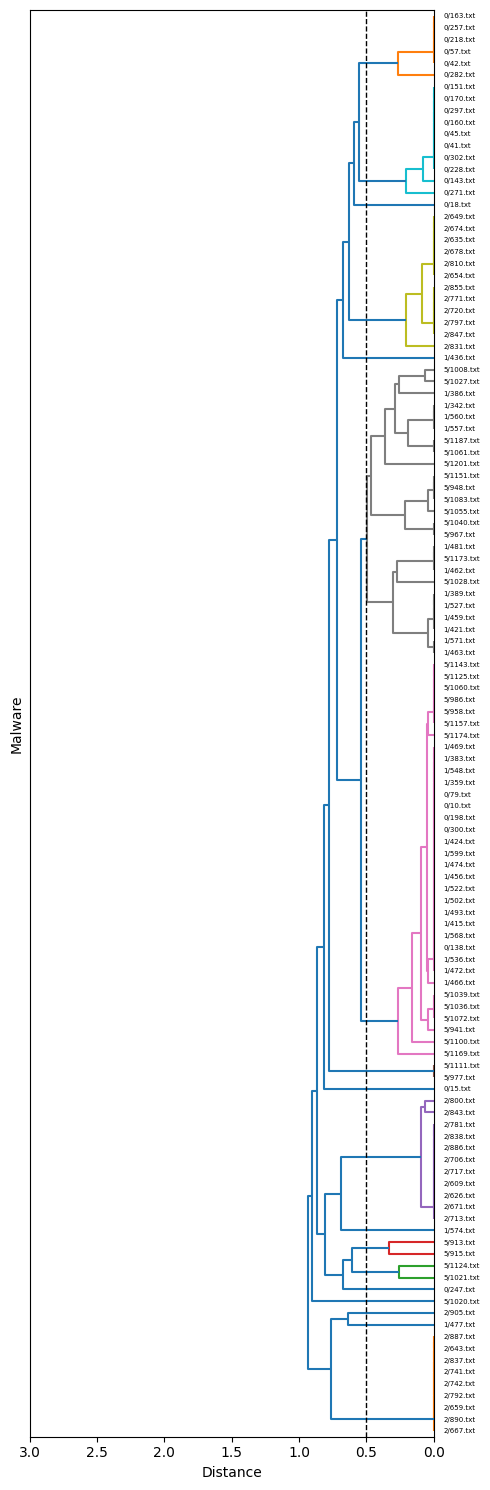

In [ ]:
# use binary features and jaccard distance

bd = sch.distance.pdist(malware_binary_call_10_df, 'jaccard')

# 用 UPGMA 法進行階層式分群
upgma_threshold = 0.5
plt.figure(figsize=(5, 15))
Z = sch. linkage(bd, method='average')

# 繪製分群樹狀圖

P = sch. dendrogram(Z, labels=malware_binary_call_10_df.index,
              color_threshold=upgma_threshold, orientation='left')
plt.axvline(x=upgma_threshold, linewidth=1, color='black', linestyle='--')

# 設定標籤和範圍
plt.xlabel('Distance')
plt.ylabel('Malware')
plt.xlim([3, 0])
plt.tight_layout()
plt.show()

### Q2-2

Jaccard looks better. Why? (open question)

Jaccard距離考慮兩個集合中共同的元素，因此更能反映資料的相似性

## Q3

### Q3-1

Try K-Means with k = 4, and compare the dbscan result with the actual class lable shown in the file name.


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = malware_call_df.values

kmeans = KMeans(n_clusters=4, random_state=0, n_init = 'auto').fit(X)
labels_true = pd.Series(malware_call_df.index).apply(lambda l: l.split('/')[0])
compare_df = pd.DataFrame({'labels_true': labels_true, 'cluster_label': kmeans.labels_})
compare_df

,labels_true,cluster_label
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1203,2,1
1204,1,0
1205,1,0
1206,1,0


### Q3-2

The cluster k=4 looks not good. How can you improve it?

調整k的值，選出最佳結果，可以畫Elbow for KMeans clustering的圖，選擇下降快速轉為平緩的點為k，分群效果佳

### Q4

Now, you can output the `malware_call_df` as a csv file, and analyze it in Orange.

In [ ]:
output_df = malware_call_df.copy()
output_df['target'] = malware_call_df.index.str.split('/').str[0]
output_df.to_csv('malware_call_df.csv')

### Q4-1

What is the best classificaiton rate you can find? What algorithm is it? You do not need to post the Orange workflow in this ipynb. Post the result is good enough.

CA : 0.953,
Random Forest比較好,
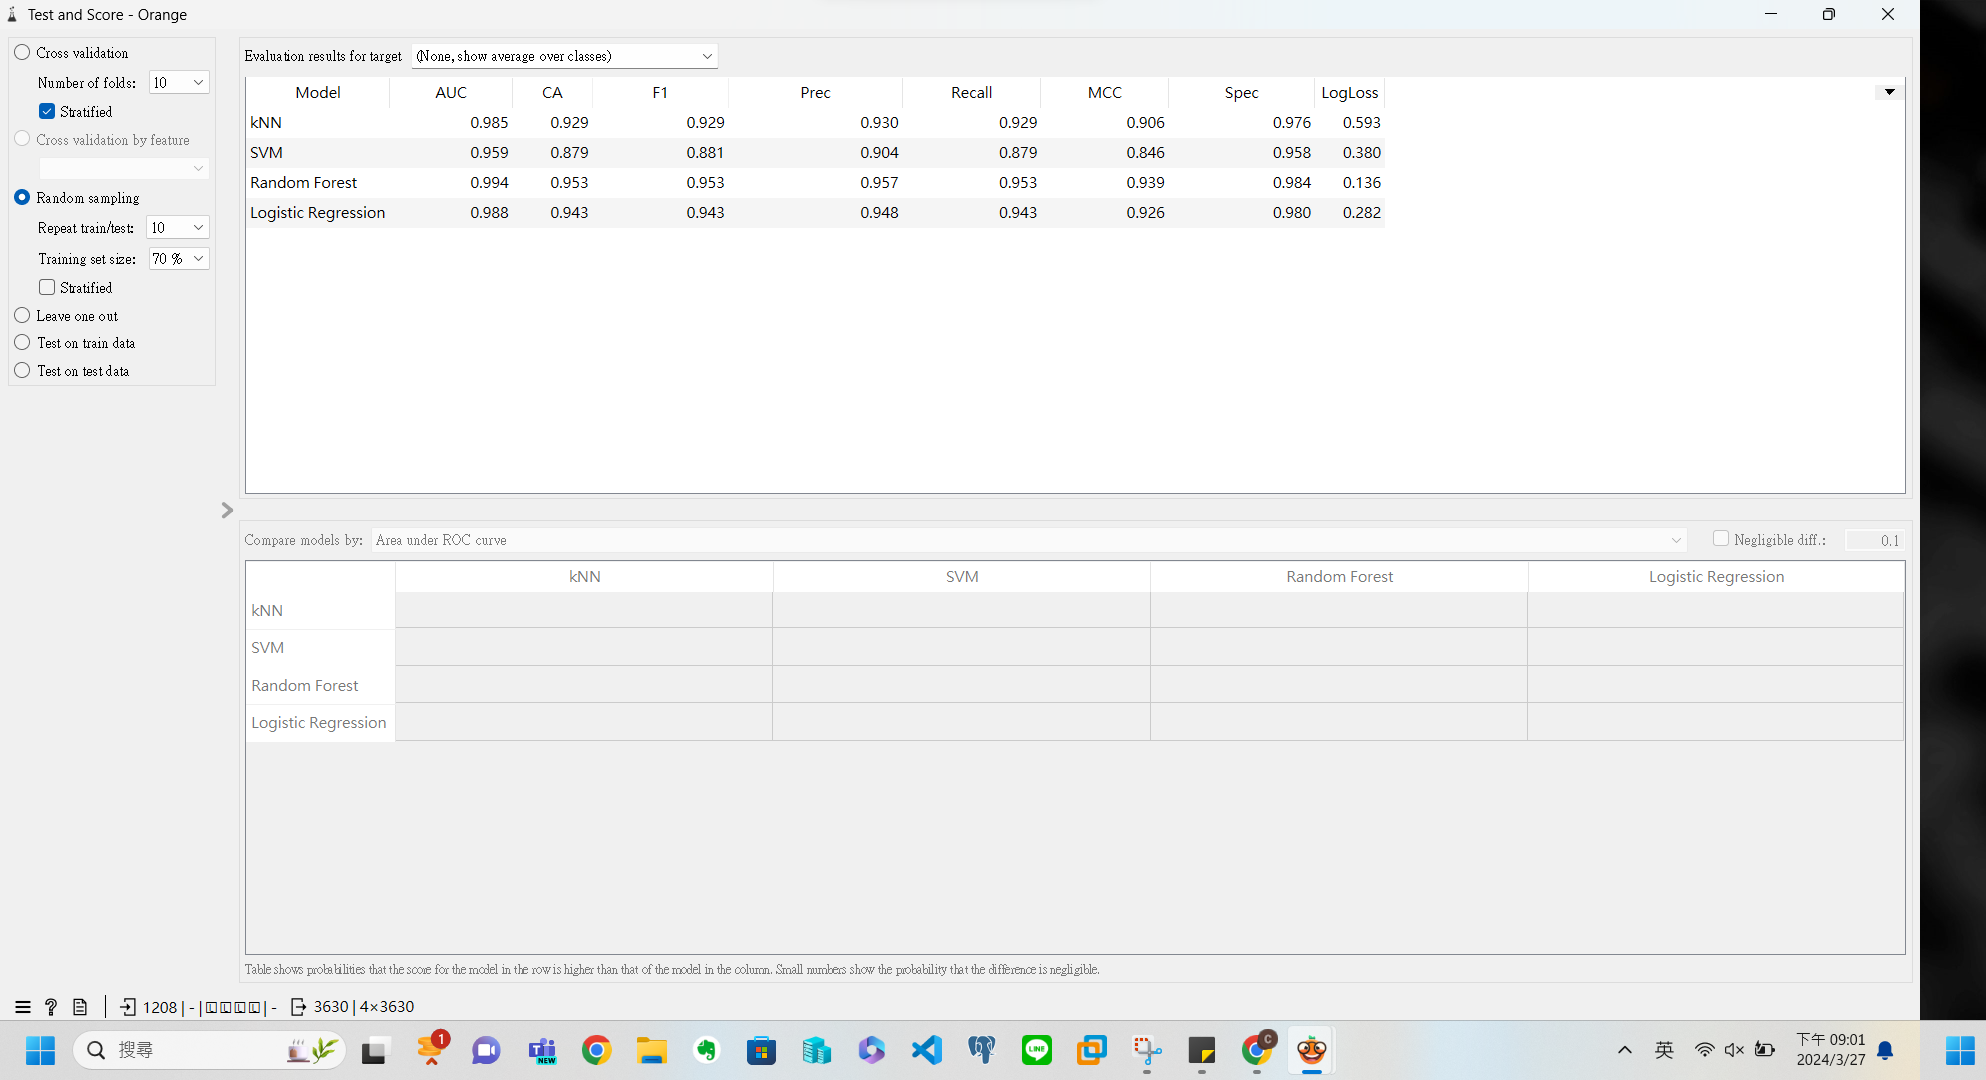

### Q4-2

Guess why the alogithim performs best? (open question)

隨機森林可以減少過度擬合。過度擬合是指模型在訓練數據上表現良好，但在新數據上表現不佳。隨機森林通過使用不同的訓練數據子集來訓練每棵決策樹，從而減少過度擬合。
隨機森林也可以處理高維數據，效果表現比較好。
